In [1]:
import pandas as pd

Effectuer une ACP sur ces données en prenant soin d'extraire les données pertinentes pour effectuer la classification d'abord sur l'espèce (sp), puis sur le sexe (sex) et enfin en croisant espèce et sexe.

In [2]:
data = pd.read_csv("../data/crabs.csv") 
data

Unnamed: 0 sp sex  index    FL    RW    CL    CW    BD
0             1  B   M      1   8.1   6.7  16.1  19.0   7.0
1             2  B   M      2   8.8   7.7  18.1  20.8   7.4
2             3  B   M      3   9.2   7.8  19.0  22.4   7.7
3             4  B   M      4   9.6   7.9  20.1  23.1   8.2
4             5  B   M      5   9.8   8.0  20.3  23.0   8.2
5             6  B   M      6  10.8   9.0  23.0  26.5   9.8
6             7  B   M      7  11.1   9.9  23.8  27.1   9.8
7             8  B   M      8  11.6   9.1  24.5  28.4  10.4
8             9  B   M      9  11.8   9.6  24.2  27.8   9.7
9            10  B   M     10  11.8  10.5  25.2  29.3  10.3
10           11  B   M     11  12.2  10.8  27.3  31.6  10.9
11           12  B   M     12  12.3  11.0  26.8  31.5  11.4
12           13  B   M     13  12.6  10.0  27.7  31.7  11.4
13           14  B   M     14  12.8  10.2  27.2  31.8  10.9
14           15  B   M     15  12.8  10.9  27.4  31.5  11.0
15           16  B   M     16  12.9  11.0  26.8  30.9  11.4
16           17  B   M     17  13.1  10.6  28.2  32.3  11.0
17           18  B   M     18  13.1  10.9  28.3  32.4  11.2
18           19  B   M     19  13.3  11.1  27.8  32.3  11.3
19           20  B   M     20  13.9  11.1  29.2  33.3  12.1
20           21  B   M     21  14.3  11.6  31.3  35.5  12.7
21           22  B   M     22  14.6  11.3  31.9  36.4  13.7
22           23  B   M     23  15.0  10.9  31.4  36.4  13.2
23           24  B   M     24  15.0  11.5  32.4  37.0  13.4
24           25  B   M     25  15.0  11.9  32.5  37.2  13.6
25           26  B   M     26  15.2  12.1  32.3  36.7  13.6
26           27  B   M     27  15.4  11.8  33.0  37.5  13.6
27           28  B   M     28  15.7  12.6  35.8  40.3  14.5
28           29  B   M     29  15.9  12.7  34.0  38.9  14.2
29           30  B   M     30  16.1  11.6  33.8  39.0  14.4
..          ... ..  ..    ...   ...   ...   ...   ...   ...
170         171  O   F     21  17.5  14.3  34.5  39.6  15.6
171         172  O   F     22  17.5  14.4  34.5  39.0  16.0
172         173  O   F     23  17.5  14.7  33.3  37.6  14.6
173         174  O   F     24  17.6  14.0  34.0  38.6  15.5
174         175  O   F     25  18.0  14.9  34.7  39.5  15.7
175         176  O   F     26  18.0  16.3  37.9  43.0  17.2
176         177  O   F     27  18.3  15.7  35.1  40.5  16.1
177         178  O   F     28  18.4  15.5  35.6  40.0  15.9
178         179  O   F     29  18.4  15.7  36.5  41.6  16.4
179         180  O   F     30  18.5  14.6  37.0  42.0  16.6
180         181  O   F     31  18.6  14.5  34.7  39.4  15.0
181         182  O   F     32  18.8  15.2  35.8  40.5  16.6
182         183  O   F     33  18.9  16.7  36.3  41.7  15.3
183         184  O   F     34  19.1  16.0  37.8  42.3  16.8
184         185  O   F     35  19.1  16.3  37.9  42.6  17.2
185         186  O   F     36  19.7  16.7  39.9  43.6  18.2
186         187  O   F     37  19.9  16.6  39.4  43.9  17.9
187         188  O   F     38  19.9  17.9  40.1  46.4  17.9
188         189  O   F     39  20.0  16.7  40.4  45.1  17.7
189         190  O   F     40  20.1  17.2  39.8  44.1  18.6
190         191  O   F     41  20.3  16.0  39.4  44.1  18.0
191         192  O   F     42  20.5  17.5  40.0  45.5  19.2
192         193  O   F     43  20.6  17.5  41.5  46.2  19.2
193         194  O   F     44  20.9  16.5  39.9  44.7  17.5
194         195  O   F     45  21.3  18.4  43.8  48.4  20.0
195         196  O   F     46  21.4  18.0  41.2  46.2  18.7
196         197  O   F     47  21.7  17.1  41.7  47.2  19.6
197         198  O   F     48  21.9  17.2  42.6  47.4  19.5
198         199  O   F     49  22.5  17.2  43.0  48.7  19.8
199         200  O   F     50  23.1  20.2  46.2  52.5  21.1

[200 rows x 9 columns]

In [3]:
import numpy as np
from numpy.linalg import eig
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler

In [4]:
mat = data.values
mat = mat[:,4:]
print(mat)


[[8.1 6.7 16.1 19.0 7.0]
 [8.8 7.7 18.1 20.8 7.4]
 [9.2 7.8 19.0 22.4 7.7]
 [9.6 7.9 20.1 23.1 8.2]
 [9.8 8.0 20.3 23.0 8.2]
 [10.8 9.0 23.0 26.5 9.8]
 [11.1 9.9 23.8 27.1 9.8]
 [11.6 9.1 24.5 28.4 10.4]
 [11.8 9.6 24.2 27.8 9.7]
 [11.8 10.5 25.2 29.3 10.3]
 [12.2 10.8 27.3 31.6 10.9]
 [12.3 11.0 26.8 31.5 11.4]
 [12.6 10.0 27.7 31.7 11.4]
 [12.8 10.2 27.2 31.8 10.9]
 [12.8 10.9 27.4 31.5 11.0]
 [12.9 11.0 26.8 30.9 11.4]
 [13.1 10.6 28.2 32.3 11.0]
 [13.1 10.9 28.3 32.4 11.2]
 [13.3 11.1 27.8 32.3 11.3]
 [13.9 11.1 29.2 33.3 12.1]
 [14.3 11.6 31.3 35.5 12.7]
 [14.6 11.3 31.9 36.4 13.7]
 [15.0 10.9 31.4 36.4 13.2]
 [15.0 11.5 32.4 37.0 13.4]
 [15.0 11.9 32.5 37.2 13.6]
 [15.2 12.1 32.3 36.7 13.6]
 [15.4 11.8 33.0 37.5 13.6]
 [15.7 12.6 35.8 40.3 14.5]
 [15.9 12.7 34.0 38.9 14.2]
 [16.1 11.6 33.8 39.0 14.4]
 [16.1 12.8 34.9 40.7 15.7]
 [16.2 13.3 36.0 41.7 15.4]
 [16.3 12.7 35.6 40.9 14.9]
 [16.4 13.0 35.7 41.8 15.2]
 [16.6 13.5 38.1 43.4 14.9]
 [16.8 12.8 36.2 41.8 14.9]
 [16.9 13.2 37

In [5]:
sc = StandardScaler()
Z = sc.fit_transform(mat)
print(Z)

[[-2.14623182e+00 -2.35244988e+00 -2.25392649e+00 -2.21777180e+00
  -2.05798865e+00]
 [-1.94546178e+00 -1.96287468e+00 -1.97228249e+00 -1.98853816e+00
  -1.94089947e+00]
 [-1.83073603e+00 -1.92391716e+00 -1.84554270e+00 -1.78477492e+00
  -1.85308259e+00]
 [-1.71601029e+00 -1.88495963e+00 -1.69063850e+00 -1.69562851e+00
  -1.70672111e+00]
 [-1.65864742e+00 -1.84600211e+00 -1.66247410e+00 -1.70836371e+00
  -1.70672111e+00]
 [-1.37183306e+00 -1.45642691e+00 -1.28225470e+00 -1.26263163e+00
  -1.23836441e+00]
 [-1.28578876e+00 -1.10580922e+00 -1.16959711e+00 -1.18622042e+00
  -1.23836441e+00]
 [-1.14238158e+00 -1.41746939e+00 -1.07102171e+00 -1.02066279e+00
  -1.06273064e+00]
 [-1.08501871e+00 -1.22268178e+00 -1.11326831e+00 -1.09707400e+00
  -1.26763670e+00]
 [-1.08501871e+00 -8.72064099e-01 -9.72446308e-01 -9.06045967e-01
  -1.09200294e+00]
 [-9.70292966e-01 -7.55191537e-01 -6.76720112e-01 -6.13136314e-01
  -9.16369171e-01]
 [-9.41611530e-01 -6.77276496e-01 -7.47131111e-01 -6.25871516e-01

/srv/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/srv/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [6]:
from sklearn.decomposition import PCA
acp = PCA(svd_solver = "full")

In [7]:
coord = acp.fit_transform(Z)

In [8]:
print(coord)

[[ 4.92757315e+00 -2.68445304e-01 -1.22257753e-01 -3.91439243e-02
   6.94690736e-02]
 [ 4.38617639e+00 -9.40735865e-02 -3.92318876e-02  5.46722132e-03
  -3.05223735e-03]
 [ 4.12866384e+00 -1.68875924e-01  3.36436339e-02  3.80969011e-02
   3.80608040e-02]
 [ 3.88368111e+00 -2.46008318e-01  1.45010217e-02  1.90937313e-02
   1.31497227e-03]
 [ 3.83405492e+00 -2.24166269e-01 -1.50673107e-02  5.46338755e-02
  -2.48839505e-02]
 [ 2.95295511e+00 -2.20020733e-01  3.84281487e-02 -6.98405039e-02
   1.89739068e-02]
 [ 2.67844235e+00  3.90230788e-02  8.17102623e-02 -3.25698384e-02
  -3.70920988e-02]
 [ 2.54843778e+00 -3.63383179e-01  6.25916514e-02 -1.60249677e-02
   4.16485833e-02]
 [ 2.58517895e+00 -1.17037655e-01  6.23383966e-02  1.45688378e-01
  -9.88150747e-03]
 [ 2.20585873e+00  7.91663049e-02  1.56973513e-01  9.06527620e-03
   1.69554776e-04]
 [ 1.75857717e+00 -1.02981368e-02  3.02371578e-01 -1.91747394e-02
  -3.00907285e-02]
 [ 1.68388431e+00  3.82340303e-02  1.93104441e-01 -1.10166168e-01

In [9]:
n= acp.n_components_
print(n)

5


In [10]:
variance = acp.explained_variance_
print(variance)


[4.81289928e+00 1.52447444e-01 4.68673106e-02 1.11913137e-02
 1.72027905e-03]


In [11]:
eigval = variance*(len(Z)-1)/len(Z)
print(eigval)

[4.78883478e+00 1.51685207e-01 4.66329741e-02 1.11353571e-02
 1.71167766e-03]


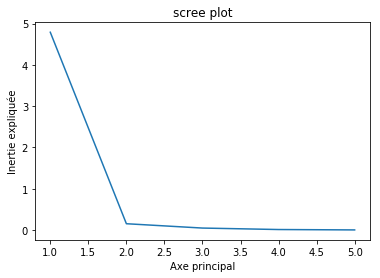

In [12]:
plt.plot(np.arange(1,n+1),eigval)
plt.title("scree plot")
plt.ylabel("Inertie expliquée")
plt.xlabel("Axe principal")
plt.show()

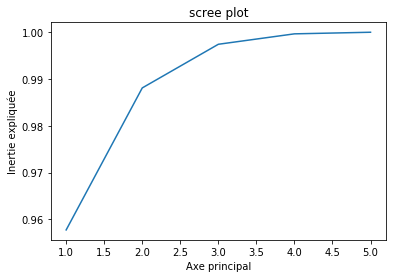

In [13]:
plt.plot(np.arange(1,n+1),np.cumsum(acp.explained_variance_ratio_))
plt.title("scree plot")
plt.ylabel("Inertie expliquée")
plt.xlabel("Axe principal")
plt.show()

In [14]:
print(acp)


PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)


In [15]:
print(Z)


[[-2.14623182e+00 -2.35244988e+00 -2.25392649e+00 -2.21777180e+00
  -2.05798865e+00]
 [-1.94546178e+00 -1.96287468e+00 -1.97228249e+00 -1.98853816e+00
  -1.94089947e+00]
 [-1.83073603e+00 -1.92391716e+00 -1.84554270e+00 -1.78477492e+00
  -1.85308259e+00]
 [-1.71601029e+00 -1.88495963e+00 -1.69063850e+00 -1.69562851e+00
  -1.70672111e+00]
 [-1.65864742e+00 -1.84600211e+00 -1.66247410e+00 -1.70836371e+00
  -1.70672111e+00]
 [-1.37183306e+00 -1.45642691e+00 -1.28225470e+00 -1.26263163e+00
  -1.23836441e+00]
 [-1.28578876e+00 -1.10580922e+00 -1.16959711e+00 -1.18622042e+00
  -1.23836441e+00]
 [-1.14238158e+00 -1.41746939e+00 -1.07102171e+00 -1.02066279e+00
  -1.06273064e+00]
 [-1.08501871e+00 -1.22268178e+00 -1.11326831e+00 -1.09707400e+00
  -1.26763670e+00]
 [-1.08501871e+00 -8.72064099e-01 -9.72446308e-01 -9.06045967e-01
  -1.09200294e+00]
 [-9.70292966e-01 -7.55191537e-01 -6.76720112e-01 -6.13136314e-01
  -9.16369171e-01]
 [-9.41611530e-01 -6.77276496e-01 -7.47131111e-01 -6.25871516e-01

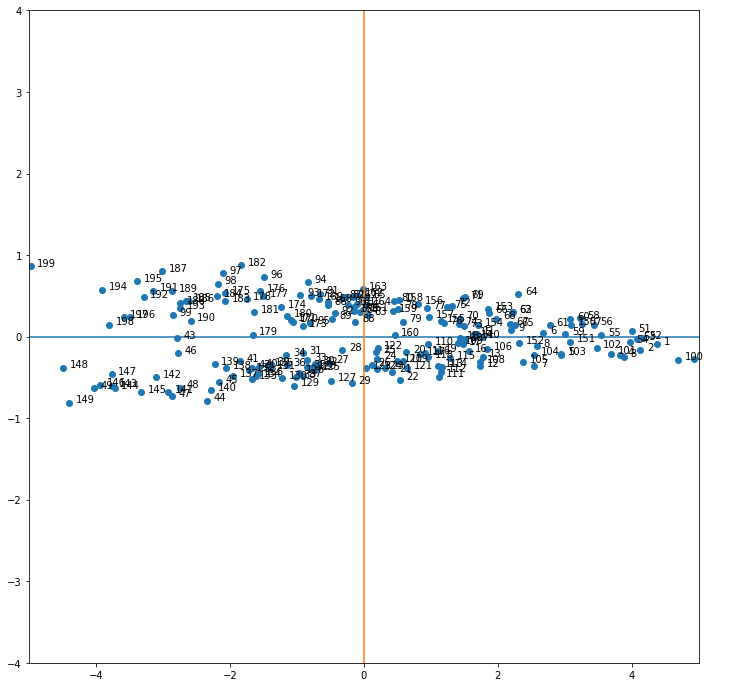

In [16]:
fig,axes=plt.subplots(figsize=(12,12))
axes.set_xlim(-5,5)
axes.set_ylim(-4,4)
plt.scatter(coord[:,0],coord[:,1])
#Les annotations
for i in range(len(Z)):
    plt.annotate(data.index[i],(coord[i,0]+0.1,coord[i,1]))
plt.plot([-5,5],[0,0],linestyle="-")
plt.plot([0,0],[-4,4],linestyle="-")
plt.show()

[[-9.89225553e-01 -5.35834770e-02 -1.14617683e-01  7.35422825e-02
   3.99208978e-03]
 [-9.36779085e-01  3.49793038e-01  2.58685744e-03 -8.83271371e-03
  -2.25138779e-03]
 [-9.91736320e-01 -1.04470135e-01  6.68747067e-02 -1.52443702e-04
  -3.27538329e-02]
 [-9.87188293e-01 -7.03362873e-02  1.40920239e-01  9.41147313e-03
   2.37695642e-02]
 [-9.87233956e-01 -1.02944869e-01 -9.56991586e-02 -7.45672444e-02
   7.27092696e-03]]


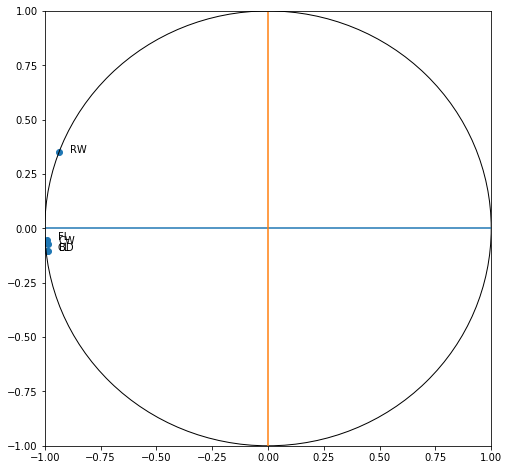

In [26]:
fig,axes = plt.subplots(figsize = (8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
corvar=np.zeros((5,5))
for k in range(5):
    corvar[:,k] = acp.components_[k,:]*np.sqrt(eigval)[k]
print(corvar)
plt.scatter(corvar[:,0],corvar[:,1])
#Les annotations
for j in range(5):
    plt.annotate(data.columns[j+4],(corvar[j,0]+0.05,corvar[j,1]))
plt.plot([-1,1],[0,0],linestyle='-')
plt.plot([0,0],[-1,1],linestyle = '-')
cercle = plt.Circle((0,0),1,fill=False)
axes.add_artist(cercle)
plt.show()